Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from datetime import datetime

df = pd.read_csv('profiles.csv')

columns = list(df.columns)
print(columns)
print(df.shape)
print(df.dtypes)

['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']
(59946, 31)
age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object


In [2]:
print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

In [3]:
# Find missing values
print(df.isnull().sum())

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
withnull = df[df.isnull().any(axis=1)]
print(withnull.head())

   age body_type             diet    drinks      drugs  \
1   35   average     mostly other     often  sometimes   
2   38      thin         anything  socially        NaN   
3   23      thin       vegetarian  socially        NaN   
4   29  athletic              NaN  socially      never   
5   29   average  mostly anything  socially        NaN   

                           education  \
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   
5  graduated from college/university   

                                              essay0  \
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   
5  i'm an australian living in san francisco, but...   

                                              essay1  \
1  dedicating eve

In [6]:
for col in columns:
    print(df[col].value_counts(dropna=False))

age
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64
body_type
average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198


In [7]:
print(df['location'].value_counts(dropna=False))

location
san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: count, Length: 199, dtype: int64


In [8]:
# remove rows with impossible values
df = df[~df['age'].isin([109, 110])]

# set NaN in body_type to rather not say
colstofill = ['body_type', 'offspring', 'pets', 'religion', 'sign', 'smokes', 'speaks']
for col in colstofill:
    df[col].fillna("rather not say", inplace=True)

# remove rows with outliers for height
df = df[(df['height'] >= 48) & (df['height'] <= 84)]

df = df[(df['status'] != 'unknown')]

# Set empty job entry to rather not say
df['job'].fillna("rather not say", inplace=True)

# Make new city and state/country columns
# Perform the split and expand to ensure two columns are always produced
split_location = df['location'].str.split(', ', n=1, expand=True)

# If the location does not have a comma, the second column might be filled with NaN.
# You can fill NaN values with a placeholder or a specific string indicating missing information.
split_location[1] = split_location[1].fillna('Unknown')

# Assign the split columns back to the DataFrame with the correct column names
df[['city', 'state_country']] = split_location

df['zodiac_sign'] = df['sign'].str.extract(r'(^[\w]+)')
df['zodiac_sign'] = df['zodiac_sign'].replace('rather', 'rather not say')

def categorizeZodiac(row):
    if pd.isnull(row) or row == 'rather not say':
        return 'neutral'
    elif 'it&rsquo;s fun to think about' in row:
        return "it's fun to think about"
    elif 'doesn&rsquo;t matter' in row:
        return 'neutral'
    elif 'matters a lot' in row:
        return 'it matters a lot'
    else:
        # Just in case lol ;) 
        return 'neutral'

df['astrology_interest'] = df['sign'].apply(categorizeZodiac)

df['religion_type'] = df['religion'].str.extract(r'(^[\w]+)')
df['religion_type'] = df['religion_type'].replace('rather', 'rather not say')


def categorizeReligiosity(row):
    if pd.isnull(row) or row == 'rather not say':
        return 'neutral'
    elif 'but not too serious about it' in row:
        return 'not serious'
    elif 'and laughing about it' in row:
        return 'laughing about it'
    elif 'and somewhat serious about it' in row:
        return 'somewhat serious'
    elif 'and very serious about it' in row:
        return 'very serious'
    else:
        return 'neutral'

df ['religion_importance'] = df['religion'].apply(categorizeReligiosity)

df = df[df['income'] <= 500000]

def findAgeDecade(row):
    return f"{(row // 10) * 10}s"
    
df['age_decade'] = df['age'].apply(findAgeDecade)


def findAgePercentiles(group):
    filtered_group = group[group['income'] > -1]
    lo = filtered_group['income'].quantile(0.25)
    hi = filtered_group['income'].quantile(0.75)
    return pd.Series({'low_threshold': lo, 'high_threshold': hi})


# Calculate thresholds for each age_decade
thresholds = df.groupby('age_decade').apply(findAgePercentiles).reset_index()

# Assuming the 'thresholds' DataFrame is correctly calculated
df = pd.merge(df, thresholds, on='age_decade', how='left')

# Function to categorize income based on the thresholds
def categorize_income(row):
    if row['income'] == -1:
        return 'unknown'
    elif row['income'] <= row['low_threshold']:
        return 'low income'
    elif row['income'] > row['high_threshold']:
        return 'high income'
    else:
        return 'middle income'

# Apply the categorization function
df['income_category'] = df.apply(categorize_income, axis=1)

In [9]:
columns = list(df.columns)
print(columns)

['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status', 'city', 'state_country', 'zodiac_sign', 'astrology_interest', 'religion_type', 'religion_importance', 'age_decade', 'low_threshold', 'high_threshold', 'income_category']


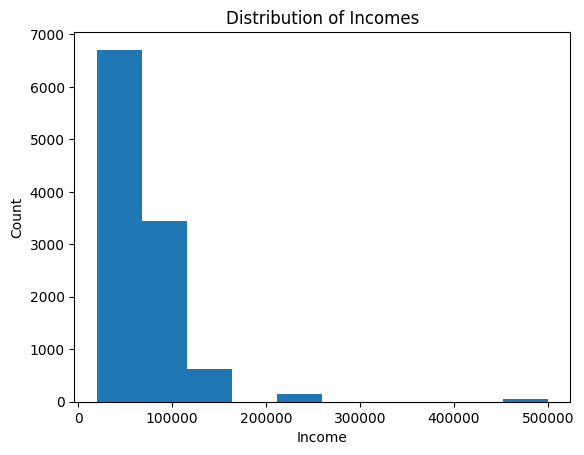

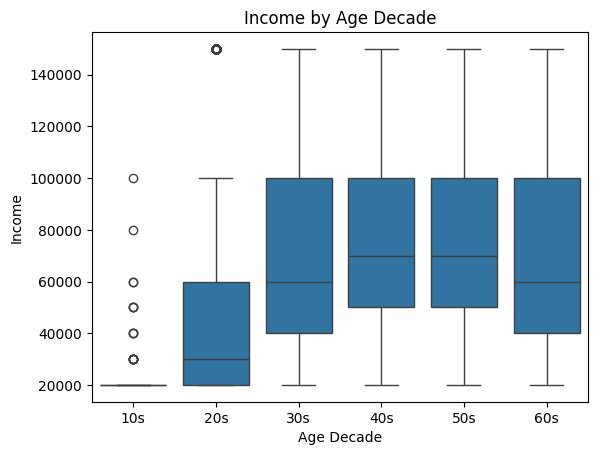

<Figure size 640x480 with 0 Axes>

In [10]:
filtered = df[(df['income'] > 0)]

plt.hist(filtered['income'])
plt.title("Distribution of Incomes")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()
plt.clf()

filteredIncomes = df[(df['income'] > 0) & (df['income'] < 200000)]
sns.boxplot(x='age_decade', y='income', data=filteredIncomes, order=sorted(filteredIncomes['age_decade'].unique()))
plt.xlabel('Age Decade')
plt.ylabel('Income')
plt.title('Income by Age Decade')
plt.show()
plt.clf()



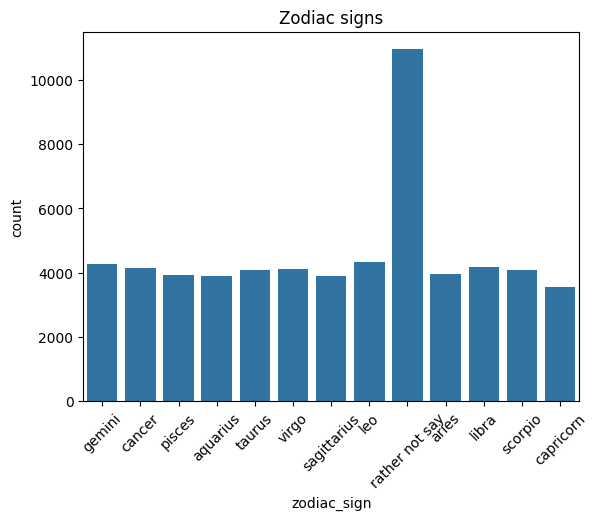

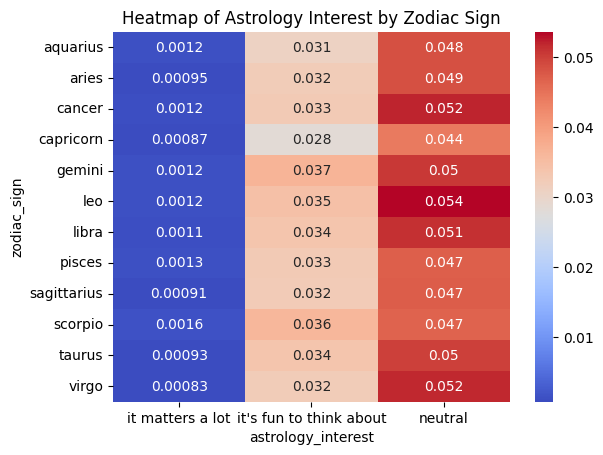

<Figure size 640x480 with 0 Axes>

In [11]:
sns.countplot(x='zodiac_sign', data=df)
plt.title("Zodiac signs")
plt.xticks(rotation=45)
plt.show()
plt.clf()

zodiacfilter = df[df['zodiac_sign'] != 'rather not say']
contingency_table = pd.crosstab(zodiacfilter['zodiac_sign'], zodiacfilter['astrology_interest'])
contingency_table = contingency_table / len(zodiacfilter)
contingency_table = contingency_table.loc[sorted(contingency_table.index)]

sns.heatmap(contingency_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Astrology Interest by Zodiac Sign')
plt.show()
plt.clf()

In [12]:
print(df['zodiac_sign'].value_counts())
print(df['astrology_interest'].value_counts())
print(df['religion_type'].value_counts())
print(df['religion_importance'].value_counts())

zodiac_sign
rather not say    10952
leo                4325
gemini             4272
libra              4164
cancer             4155
virgo              4110
taurus             4094
scorpio            4084
aries              3953
pisces             3912
sagittarius        3903
aquarius           3897
capricorn          3543
Name: count, dtype: int64
astrology_interest
neutral                    39572
it's fun to think about    19147
it matters a lot             645
Name: count, dtype: int64
religion_type
rather not say    20088
agnosticism        8716
other              7614
atheism            6891
christianity       5748
catholicism        4730
judaism            3078
buddhism           1917
hinduism            446
islam               136
Name: count, dtype: int64
religion_importance
neutral              31774
not serious          12138
laughing about it     8831
somewhat serious      4465
very serious          2156
Name: count, dtype: int64


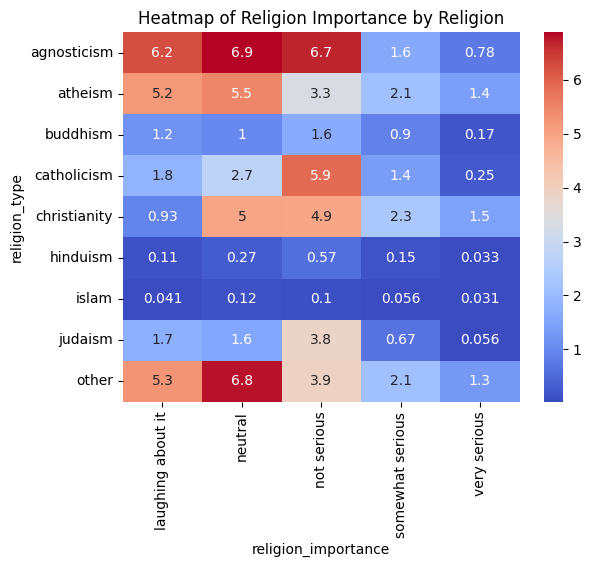

<Figure size 640x480 with 0 Axes>

In [13]:
filteredreligion = df[df['religion_type'] != 'rather not say']
religion_importance_freq = pd.crosstab(filteredreligion.religion_type, filteredreligion.religion_importance)
religion_importance_freq = religion_importance_freq/len(filteredreligion) * 100

sns.heatmap(religion_importance_freq, annot=True, cmap='coolwarm')
plt.title('Heatmap of Religion Importance by Religion')
plt.show()
plt.clf()

DECISION TREES

In [14]:
numerical_features = ['age', 'height', 'income']
categorical_cols = ['body_type', 'diet', 'ethnicity', 'job', 'location', 'offspring', 'orientation', 'pets', 
                    'religion', 'sex', 'sign', 'speaks', 'city', 'state_country', 'zodiac_sign', 
                    'astrology_interest', 'religion_type', 'religion_importance', 'age_decade', 'income_category', 'education']
ordinal_cols = ['drinks', 'drugs', 'education', 'smokes']
exclude_columns = ['status', 'last_online', 
                   'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 
                   'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

df['last_online'] = pd.to_datetime(df['last_online'], format='%Y-%m-%d-%H-%M')
reference_date = datetime.now()
df['days_since_last_online'] = (reference_date - df['last_online']).dt.days


df_encoded = pd.get_dummies(df, columns=categorical_cols)

drinks_order = {
    'not at all': 0,
    'rarely': 1,
    'socially': 2,
    'often': 3,
    'very often': 4,
    'desperately': 5
}

drugs_order = {
    'never': 0,
    'sometimes': 1,
    'often': 2
}

smokes_order = {
    'no': 0,
    'sometimes': 1,
    'when drinking': 1,
    'rather not say': 1,
    'trying to quit': 2,
    'yes': 3
}

df_encoded['drinks'] = df['drinks'].map(drinks_order)
df_encoded['drugs'] = df['drugs'].map(drugs_order)
df_encoded['smokes'] = df['smokes'].map(smokes_order)

X = df_encoded.drop(columns=exclude_columns)
y = df_encoded[['status']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

tree = DecisionTreeClassifier(max_depth = 10000)

max_features = max(int(len(X_train.columns) * 0.001), 1)

sfs = SFS(tree, 
          k_features=(1, max_features), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5)


print(len(X.columns))
print(X.columns)


#print(len(df_to_encode.columns))
#sfs.fit(X_train, y_train)
#selected_features = list(sfs.k_feature_idx_)
#print(X_train.columns[selected_features])


                    



8429
Index(['age', 'drinks', 'drugs', 'height', 'income', 'smokes', 'low_threshold',
       'high_threshold', 'days_since_last_online', 'body_type_a little extra',
       ...
       'education_space camp', 'education_two-year college',
       'education_working on college/university',
       'education_working on high school', 'education_working on law school',
       'education_working on masters program',
       'education_working on med school', 'education_working on ph.d program',
       'education_working on space camp',
       'education_working on two-year college'],
      dtype='object', length=8429)


NameError: name 'df_to_encode' is not defined